<!--- mission_number=4 file_list=["births.csv"] mode="singlescreen" --->

# Probability mass functions
## Learn about probability mass functions while analyzing data on pregnancies.
## Author

<!--- type="code" --->

# Introduction to the data

In this lesson, we'll be working with data from the [National Survey of Family Growth](http://www.cdc.gov/nchs/nsfg.htm).  The data was collected from January 2002 to March 2003.  It contains data on pregnancy, family life, and more.  We'll use it to explore various correlations.

We've selected a few columns from the original data, which are:

* `prglngth` -- the length of the pregnancy in weeks.
* `birthord` -- which child this was for the pregnant mother.
* `birthwgt_lb1` -- the pounds portion of the birth weight.
* `birthwgt_oz1` -- the ounces portion of the birth weight.
* `agepreg` -- the mother's age at the end of the pregnancy, in years.

## Instructions

Find the mean `agepreg` for mothers in `firsts`.  Assign the result to `mean_firsts_agepreg`.

Find the mean `agepreg` for mothers in `others`.  Assign the result to `mean_others_agepreg`.

## Hint

The `.mean()` method on a series will find the mean value.

In [1]:
## Display

# Read in all of the birth data
import pandas
with open("births.csv", 'r') as f:
    births = pandas.read_csv(f)
    
# There are large differences between the first pregnancy and subsequent onces, so let's split the data up.
firsts = births[births["birthord"] == 1]
others = births[births["birthord"] > 1]

# We end up with around 7000 rows for each.
print(others.shape)
print(firsts.shape)

## Answer

mean_firsts_agepreg = firsts["agepreg"].mean()
mean_others_agepreg = others["agepreg"].mean()

## Check vars

["mean_firsts_agepreg", "mean_others_agepreg"]

(7609, 5)
(6683, 5)


['mean_firsts_agepreg', 'mean_others_agepreg']

<!--- type="code" --->

# What's a PMF?

A [probability mass function](http://en.wikipedia.org/wiki/Probability_mass_function) is a function that maps from a discrete rabdom variable to the probability of each value occuring.  In the case of our dataset, a discrete random variable is just a column.

Before we generate a probability mass function, we generate a histogram, which just contains counts of each unique value occuring.

## Instructions

Extend the `Pmf` class to generate probabilities instead of counts.  Once easy way to achieve this is to divide the count of each unique item by the total number of items.  All the probabilities should sum to 1.

Assign the dictionary containing the probability of each unique value occuring in the column `prglngth` in `firsts` to `prglngth_firsts_pmf`.

## Hint

Find the total length of the column using `len(column)`.  Then, just divide the number of times each item occurs by the total length to get the probability of the item occuring in the column.

In [2]:
## Display

# Let's make a histogram class that counts up all the unique values in a column.
from collections import Counter
class Hist(object):
    def __init__(self, column):
        counts = Counter(column)
        self.counts = dict(counts)

# We can use the class to count up the unique values in prglngth.
prglngth_firsts_hist = Hist(firsts["prglngth"])
print(prglngth_firsts_hist.counts)

class Pmf(Hist):
    pass

## Answer

class Pmf(Hist):
    def __init__(self, column):
        counts = Counter(column)
        self.counts = dict(counts)
        total = len(column)
        for c in self.counts:
            self.counts[c] /= total

prglngth_firsts_pmf = Pmf(firsts["prglngth"]).counts

## Check vars

["prglngth_firsts_pmf"]

{0: 1, 17: 1, 20: 1, 21: 3, 22: 6, 23: 1, 24: 10, 25: 7, 26: 29, 27: 5, 28: 18, 29: 17, 30: 95, 31: 21, 32: 73, 33: 27, 34: 74, 35: 238, 36: 288, 37: 365, 38: 573, 39: 2771, 40: 1043, 41: 537, 42: 341, 43: 113, 44: 18, 45: 2, 46: 2, 48: 3}


['prglngth_firsts_pmf']

<!--- type="code" --->

# Plotting a pmf

We can plot a pmf to see the probability distribution.  This can be done with matplotlib.

## Instructions

`prglngth_firsts_pmf` and `prglngth_others_pmf` are both dictionaries containing the probabilities of each value in their respective dataset and column pairs occuring.  `prglngth_firsts_pmf` contains probabilities for `prglngth` in the `firsts` dataset.

Plot both pmfs as basic bar charts, using the template `plt.bar(x, y)`.  Be sure to use `plt.show()` after plotting each pmf.  Also be sure to sort the dictionary keys from lowest to highest before you plot.

## Hint

You can get the keys from a dictionary `d` using `d.keys()`, and sort them using `keys = sorted(d.keys())`.  These will be your x axis values.  You can get the y axis values using `[d[k] for k in keys]`.  Then it's a simple matter of doing `plt.bar(keys, y)`.


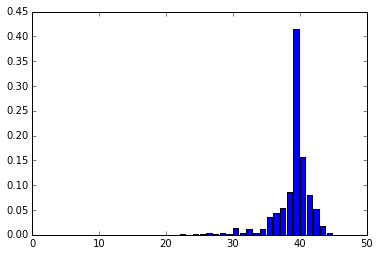

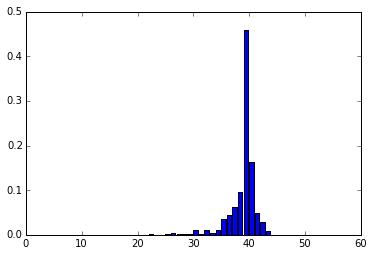

In [7]:
## Initial

class Pmf(Hist):
    def __init__(self, column):
        counts = Counter(column)
        self.counts = dict(counts)
        total = len(column)
        for c in self.counts:
            self.counts[c] /= total

prglngth_firsts_pmf = Pmf(firsts["prglngth"]).counts
prglngth_others_pmf = Pmf(others["prglngth"]).counts

## Display

prglngth_others_pmf = Pmf(others["prglngth"]).counts

import matplotlib.pyplot as plt

## Answer

def get_plot_data(pmf):
    keys = sorted(pmf.keys())
    y = [pmf[k] for k in keys]
    return keys, y

firsts_pmf = get_plot_data(prglngth_firsts_pmf)
others_pmf = get_plot_data(prglngth_others_pmf)

plt.bar(firsts_pmf[0], firsts_pmf[1])
plt.show()

plt.bar(others_pmf[0], others_pmf[1])
plt.show()

## Check vars

["dq_plot1", "dq_plot2"]


<!--- type="code" --->

# Finding differences between PMFs

We can also find the difference between 2 PMFs.  This is as simple as subtracting the probabilities of each value occuring for one from the other.  It is made slightly complicated by dealing with values that only occur in one, but not the other.

## Instructions

Make a list of all the keys that occur in `prglngth_firsts_pmf` and `prglngth_others_pmf`.  These keys should be unique (each value in the list should only occur once).  Sort this list in ascending order.  Assign this to `prglngth_all_keys`.

For each key in `prglngth_all_keys`, find the corresponding probability in `prglngth_firsts_pmf` (probability is 0 if key not found) and subtract the corresponding probability in `prglngth_others_pmf`.  Make a list with all the results, called `prglngth_prob_diffs`.

Make a basic bar plot with `prglngth_all_keys` on the x axis, and `prglngth_prob_diffs` on the y axis.

## Hint

If we have a list `a`, `list(set(a))` will make it unique.  Remember to use `plt.show()` after plotting.


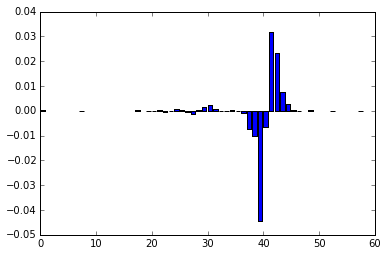

['all_keys', 'prglngth_prob_diffs', 'dq_plot1']

In [9]:
## Display

# See the instructions for how to proceed.

## Answer

combined_keys = list(prglngth_firsts_pmf.keys()) + list(prglngth_others_pmf.keys())
unique_keys = list(set(combined_keys))
all_keys = sorted(unique_keys)
prglngth_prob_diffs = [prglngth_firsts_pmf.get(k, 0) - prglngth_others_pmf.get(k, 0) for k in all_keys]

plt.bar(all_keys, prglngth_prob_diffs)
plt.show()

## Check vars

["all_keys", "prglngth_prob_diffs", "dq_plot1"]